In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [90]:
df = pd.read_csv("/Users/schlinkertc/Flatiron/projects/classification/files/data.csv",index_col='cik')
df.shape

(7619, 13)

In [91]:
df['manufacturing'] = df['sic'].map(lambda x: 3000<x<4000)
df.drop(columns=['sic','adsh'],inplace=True)

In [92]:
Mdf = df[df['manufacturing']==True]
nonMdf = df[df['manufacturing']==False]

In [155]:
df.head()

,Income/OperationsCash,Income/FinancingCash,Income/Investing,Assets,LiabilitiesAndStockholdersEquity,StockholdersEquity,NetIncomeLoss,NetCashProvidedByUsedInOperatingActivities,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,debt_ratio,manufacturing
cik,,,,,,,,,,,,
1800,5.263911,1.627736,-4.241980,5.672100e+10,6.445800e+10,2.571750e+10,7.433636e+08,3.913000e+09,1.210000e+09,-3.153333e+09,0.683001,False
1800,7.219285,-2.167270,-5.374830,6.500100e+10,7.171150e+10,3.071050e+10,6.959600e+08,5.024333e+09,-1.508333e+09,-3.740667e+09,0.630775,False
1961,-1.955330,0.948643,3.989816,2.015174e+06,2.015174e+06,-3.441431e+06,6.289942e+05,-1.229892e+06,5.966910e+05,2.509572e+06,2.707759,False
2034,-1.136919,-1.162120,1.879211,9.109045e+08,9.109045e+08,2.634488e+08,-5.224764e+07,5.940133e+07,6.071800e+07,-9.818433e+07,0.710783,False
2098,3.450583,4.135294,-5.854293,1.033979e+08,1.033979e+08,4.641397e+07,1.980548e+06,6.834044e+06,8.190148e+06,-1.159471e+07,0.551113,True


In [38]:
# # remove records that have column values with a z-score greater than the absolute value of 3
# from scipy import stats

# for x in df.columns:
#     try:
#         df = df[(np.abs(stats.zscore(df[x])) < 3)]
#     except:
#         continue

Target Variable
manufacturing
False    6126
True     1493
Name: manufacturing, dtype: int64


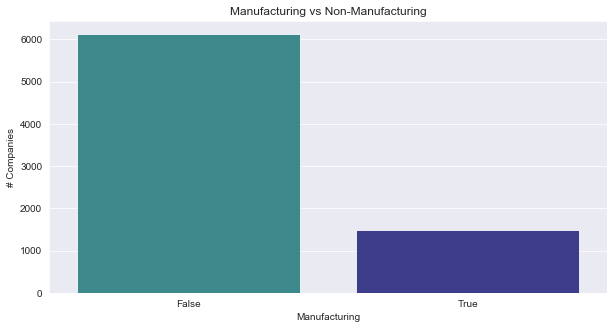

In [122]:
# Manufacturing Count
print('Target Variable')
print(df.groupby(['manufacturing']).manufacturing.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['manufacturing'], alpha =.80, palette= ['teal','navy'])
plt.title('Manufacturing vs Non-Manufacturing')
plt.ylabel('# Companies')
plt.xlabel('Manufacturing')
plt.show()

In [94]:
df.columns

Index(['Income/OperationsCash', 'Income/FinancingCash', 'Income/Investing',
       'Assets', 'LiabilitiesAndStockholdersEquity', 'StockholdersEquity',
       'NetIncomeLoss', 'NetCashProvidedByUsedInOperatingActivities',
       'NetCashProvidedByUsedInFinancingActivities',
       'NetCashProvidedByUsedInInvestingActivities', 'debt_ratio',
       'manufacturing'],
      dtype='object')

In [95]:
df['Income/FinancingCash'].quantile(.75)

0.7827270473818055

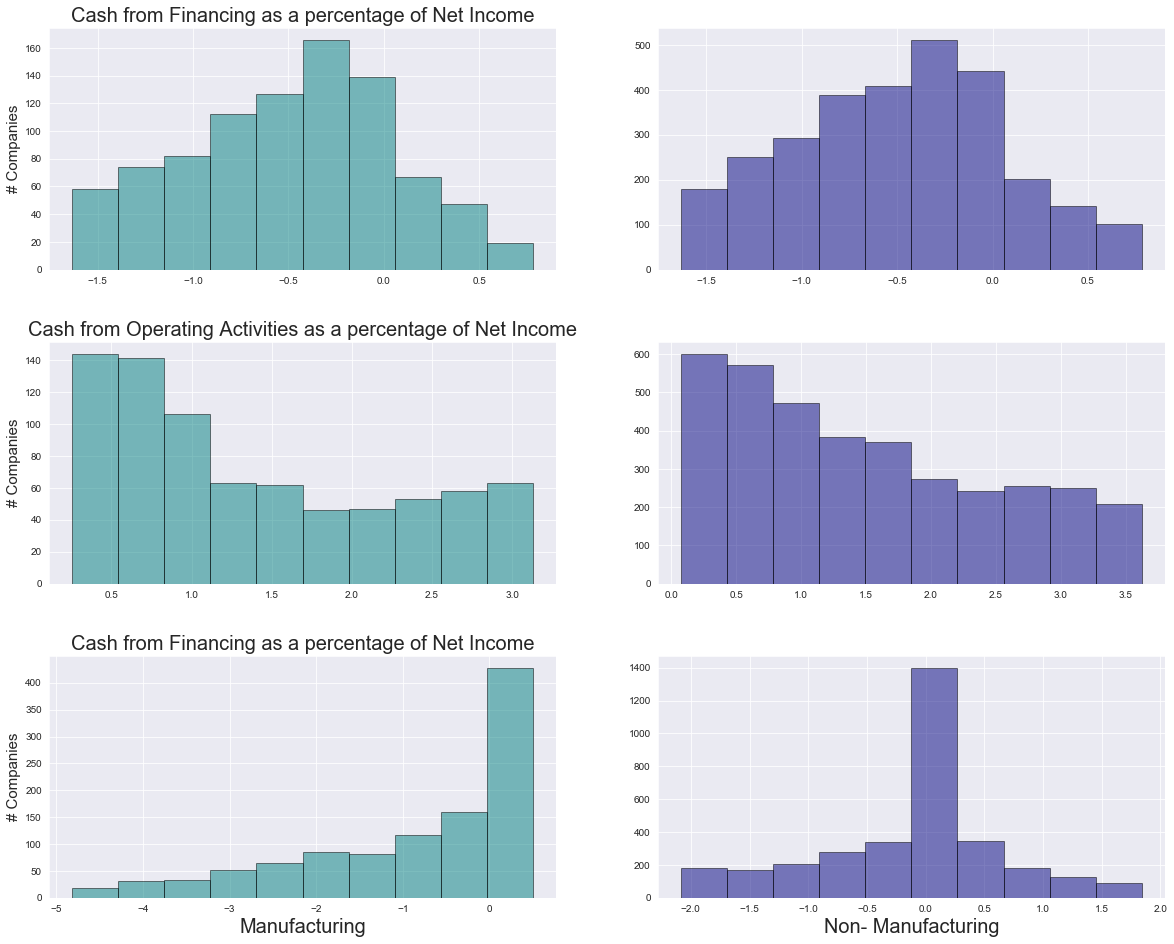

In [220]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

## Financing 
#manufacturing 
ax1 = fig.add_subplot(321)
ax1.hist(Mdf['Income/FinancingCash'],
         alpha = .50,
         edgecolor= 'black',
         color ='teal',
         density=False,
         range=(df['Income/FinancingCash'].quantile(.25),df['Income/FinancingCash'].quantile(.75)))

ax1.set_ylabel('# Companies',fontsize = 15)
ax1.set_title(
    'Cash from Financing as a percentage of Net Income',
    fontsize = 20,
    
)

#non-manufacturing
ax2 = fig.add_subplot(322)
ax2.hist(nonMdf['Income/FinancingCash'],
         alpha = .50,
         edgecolor= 'black',
         color ='navy',
         density=False,
         range=(df['Income/FinancingCash'].quantile(.25),df['Income/FinancingCash'].quantile(.75)))


## Operating
#Manufacturing
ax3 = fig.add_subplot(323)
ax3.hist(Mdf['Income/OperationsCash'], 
         alpha = .50,
         edgecolor= 'black',
         color ='teal',
         density=False,
         range=(df['Income/OperationsCash'].quantile(.25),df['Income/OperationsCash'].quantile(.75)))
        
ax3.set_ylabel('# Companies',fontsize = 15)
ax3.set_title(
    'Cash from Operating Activities as a percentage of Net Income',
    fontsize = 20
)

#Non-Manufacturing
ax4 = fig.add_subplot(324)
ax4.hist(nonMdf['Income/OperationsCash'], 
         alpha = .50,
         edgecolor= 'black',
         color ='navy',
         density=False,
         range=(df['Income/OperationsCash'].quantile(.20),df['Income/OperationsCash'].quantile(.80)))

## Investing
#Manufacturing
ax5 = fig.add_subplot(325)
ax5.hist(Mdf['Income/Investing'], 
         alpha = .50,
         edgecolor= 'black',
         color ='teal',
         density=False,
         range=(df['Income/Investing'].quantile(.20),df['Income/Investing'].quantile(.80)))
        
ax5.set_ylabel('# Companies',fontsize = 15)
ax5.set_title('Cash from Financing as a percentage of Net Income',fontsize = 20)
ax5.set_xlabel('Manufacturing',fontsize=20)

#Non-Manufacturing
ax6 = fig.add_subplot(326)
ax6.hist(nonMdf['Income/Investing'], 
         alpha = .50,
         edgecolor= 'black',
         color ='navy',
         density=False,
         range=(df['Income/FinancingCash'].quantile(.20),df['Income/FinancingCash'].quantile(.80)))
ax6.set_xlabel('Non- Manufacturing',fontsize=20)

plt.show()

In [157]:
df.head()

,Income/OperationsCash,Income/FinancingCash,Income/Investing,Assets,LiabilitiesAndStockholdersEquity,StockholdersEquity,NetIncomeLoss,NetCashProvidedByUsedInOperatingActivities,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,debt_ratio,manufacturing
cik,,,,,,,,,,,,
1800,5.263911,1.627736,-4.241980,5.672100e+10,6.445800e+10,2.571750e+10,7.433636e+08,3.913000e+09,1.210000e+09,-3.153333e+09,0.683001,False
1800,7.219285,-2.167270,-5.374830,6.500100e+10,7.171150e+10,3.071050e+10,6.959600e+08,5.024333e+09,-1.508333e+09,-3.740667e+09,0.630775,False
1961,-1.955330,0.948643,3.989816,2.015174e+06,2.015174e+06,-3.441431e+06,6.289942e+05,-1.229892e+06,5.966910e+05,2.509572e+06,2.707759,False
2034,-1.136919,-1.162120,1.879211,9.109045e+08,9.109045e+08,2.634488e+08,-5.224764e+07,5.940133e+07,6.071800e+07,-9.818433e+07,0.710783,False
2098,3.450583,4.135294,-5.854293,1.033979e+08,1.033979e+08,4.641397e+07,1.980548e+06,6.834044e+06,8.190148e+06,-1.159471e+07,0.551113,True


In [170]:
pd.options.display.float_format = '${:,.1f}'.format
print('Manufacturing')
display(df[df['manufacturing']==True][['NetIncomeLoss','Assets']].describe()[1:].transpose())

Manufacturing


,mean,std,min,25%,50%,75%,max
NetIncomeLoss,"$89,918,590.0","$802,759,035.2","$-5,342,937,500.0","$-6,835,736.8","$115,972.0","$26,121,666.7","$23,768,272,727.3"
Assets,"$3,999,745,592.9","$19,491,542,236.4",$41.7,"$18,912,500.0","$210,171,333.3","$1,636,626,000.0","$371,481,400,000.0"


In [169]:
print('Non-Manufacturing')
display(df[df['manufacturing']==False][['NetIncomeLoss','Assets']].describe()[1:].transpose())

Non-Manufacturing


,mean,std,min,25%,50%,75%,max
NetIncomeLoss,"$128,165,328.7","$985,939,985.2","$-6,056,800,000.0","$-6,566,131.2","$785,483.7","$35,678,000.0","$27,216,000,000.0"
Assets,"$10,266,527,049.0","$87,874,765,767.4","$-427,802,125.0","$37,157,698.9","$471,254,900.0","$2,896,480,500.0","$3,349,879,857,142.9"


In [221]:
def feature_summary(X,Y):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize = (16,10))
    fig.subplots_adjust(hspace = .30)

    ax1 = fig.add_subplot(221)
    ax1.hist(df[df['manufacturing']==True][X], 
             label ='Manufacturing', 
             alpha = .5,
             edgecolor= 'green',
             color ='teal',
             density=True,
             range=(df[X].quantile(.20),df[X].quantile(.80)))
    ax1.hist(df[df['manufacturing'] ==False][X], 
             label ='Non-Manufacturing', 
             alpha = .50,
             edgecolor= 'black',
             color ='navy',
             density=True,
             range=(df[X].quantile(.20),df[X].quantile(.80)))

    ax2 = fig.add_subplot(223)
    ax2.hist(df[df['manufacturing'] ==True][Y], 
             label ='Manufacturing', 
             alpha = .5,
             edgecolor= 'green',
             color ='teal',
             density=True,
             range=(df[Y].quantile(.20),df[Y].quantile(.80)))
    ax2.hist(df[df['manufacturing'] ==False][Y], 
             label ='Non-Manufacturing', 
             alpha = .50,
             edgecolor= 'black',
             color ='navy',
             density=True,
             range=(df[Y].quantile(.20),df[Y].quantile(.80)))

    ax3 = fig.add_subplot(122)
    ax3.scatter(x = df[df['manufacturing']==False][X], 
                y = df[df['manufacturing']==0][Y],
                alpha = .50,
                edgecolor= 'black',  
                c = 'navy', 
                s= 75, 
                label = 'Non-Manufacturing')
    ax3.scatter(x = df[df['manufacturing']==True][X], y = df[df['manufacturing']==1][Y],
                            alpha = .50,edgecolors= 'black',  c = 'teal', s= 75, label = 'Manufacturing')

    ax1.set_title(f'{X}: Manufacturing vs Non-Manufacturing')
    ax1.set_xlabel(f'{X}')
    ax1.set_ylabel('Relative Freq')
    ax1.legend(loc = 'upper right')

    ax2.set_title(f'{Y}: Manufacturing vs Non-Manufacturing')
    ax2.set_xlabel(f'{Y}')
    ax2.set_ylabel('Relative Freq')
    ax2.legend(loc = 'upper right')

    ax3.set_xlabel(f'{X}')
    ax3.set_ylabel(f'{Y}')
    ax3.set_title(f'{X} vs {Y}')
    ax3.legend()

    plt.show()

In [225]:
df['Liabilities'] = df['LiabilitiesAndStockholdersEquity']-df['StockholdersEquity']

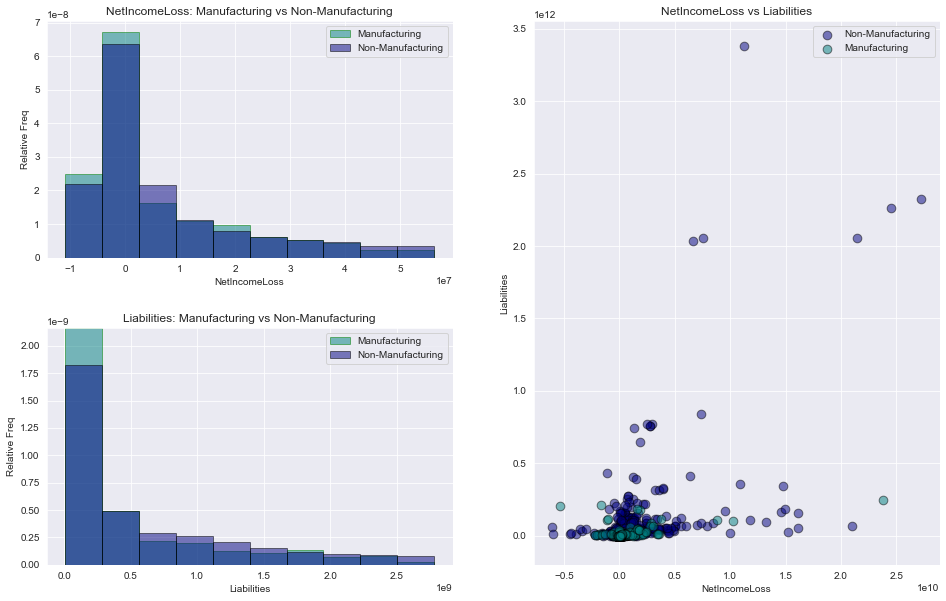

In [226]:
feature_summary('NetIncomeLoss','Liabilities')